##### The Efficient Frontier - Part 2
Let's start by loading the returns and generating the expected returns vector and the covariance matrix.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import portfolio_management_lib as port

ind = port.get_ind_returns()
# ind Annualized return from 2000, monthly base
ind_annualized_return = port.annualize_rets(ind["1996" : "2000"], "Monthly")
# Covariance Matrix
cov = ind["1996":"2000"].cov() 

/home/joe/Study/portfolio_management_prac/lib/portfolio_management_lib.py:215: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


AS a first exercies, let's assume taht we have some weights and let's try and compute the returns and volaility of a portfolio, given a set of weights, returns and a covariance matrix.

In [3]:
def portfolio_returns(weights, returns):
    """
    Compute the return on a portfolio from consituent returns and weights.
    Weights are a numpy array or N x 1 Matrix and returns are numpy array or Nx1 Matrix.
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Will return s.d. not a volatility
    Computes the vol of a portfolio from a covariance matrix and constitutent weight.
    Weights are a numpy array or N x 1 matrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights) ** 0.5

In [4]:
l = ["Food", "Beer", "Smoke", "Coal"]

In [5]:

ind_annualized_return[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [6]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [10]:
import pandas as pd
import numpy as np

# Generate the weights using np, where all the assets are equally distributed
sample_weights = np.repeat(0.25, 4)

sample_weights

array([0.25, 0.25, 0.25, 0.25])

In [8]:
# get the expected return based on the given weights.
port.portfolio_returns(sample_weights, ind_annualized_return[l])

np.float64(0.19511097196038385)

In [9]:
# get the expected volatility based on the sample weights of each assets.
port.portfolio_vol(sample_weights, cov.loc[l, l])

np.float64(0.055059195776437045)

### The 2-Asset Case
In the case of 2 assets, the problem is somewhat simplified, since the weight of the second asset is $ (1 - weight\_of\_the\_first\_asset) $.


Let's write a function that draws the efficient frontier for a simple 2 asset case.

Start by generating a sequence of weights in a list of tuples. Python makes it easy to generate a list by using something called a list comprehension, which we can think of as an efficient way to generate a list of values instead of writing a for loop.

In [12]:
import numpy as np

n_points = 20
sample_weights = [np.array([w, 1 - w]) for w in np.linspace(0, 1, n_points)]

sample_weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [16]:
sample_weights[0]

array([0., 1.])

<Axes: xlabel='V', ylabel='R'>

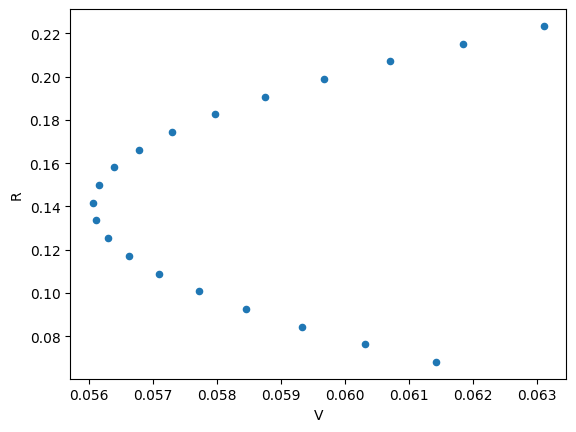

In [20]:
l = ["Games", "Fin"]
rets = [port.portfolio_returns(sample_weight, ind_annualized_return[l]) for sample_weight in sample_weights]
vols = [port.portfolio_vol(sample_weight, cov.loc[l, l]) for sample_weight in sample_weights]

ef = pd.DataFrame({"R": rets, "V": vols})
ef.plot.scatter(x = "V", y = "R")

<Axes: xlabel='V'>

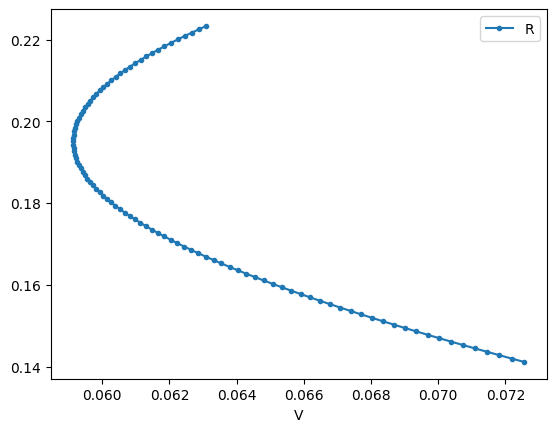

In [25]:
l = ["Fin", "Beer"]
port.plot_ef2(ind_annualized_return[l].values,
              cov.loc[l, l],
              n_points = 25,
            )